### Neste documento foi realizado um pequeno resumo dos principais conceitos da estatística

![estatistica](estatistica1.jpg)

## Estatística Descritiva

![estatistica](estatistica2.jpg)

In [1]:
#Vamos gerar uma massa de dados aleatórios para descrever e aplicar os principais conceitos em estatística descritiva 
# Usamos sample() para criar amostras aleatórias de um conjunto de dados ou intervalo.
# 1:50: Isso define o intervalo de onde queremos amostrar.
#1000: Esse é o tamanho da amostra que queremos gerar
#replace = TRUE: amostragem é com reposição, o que significa que um número pode ser escolhido mais de uma vez na amostra.
dados <- sample(1:50, 1000, replace = TRUE)

In [2]:
#Calculo da média
mean(dados)

[1] 26.002

In [3]:
#Resumo estatístico dos dados
summary(dados)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1      13      26      26      39      50 

In [4]:
#Calculo da mediana
# Ela representa o valor do meio de um conjunto de dados ordenado
#A mediana é uma medida de tendência central que é menos sensível a valores extremos (outliers) do que a média aritmética
# Quando calculamos a mediana, 50% dos valores são maiores do que a mediana e 50% dos valores são menores do que a mediana.
median(dados)

[1] 26

**Uma distribuição de frequência que apresenta apenas uma moda é chamada de unimodal.     
Se a distribuição apresenta dois pontos de alta concentração ela é chamada de bimodal.   
Distribuições bimodais ou multimodais podem indicar que na realidade a distribuição de frequência se refere a duas populações cujas medidas foram misturadas.**

In [5]:
# Criar uma tabela de frequência
#A função table(dados) conta quantas vezes cada valor único ocorre no vetor dados
tabela_frequencia <- table(dados)

# A função which.max() é usada para encontrar o índice do valor com a maior frequência na tabela de frequência 
# A função names() acessará o valor diretamente, sem exibir o índice associado a ele. 
names(which.max(tabela_frequencia))

[1] "11"

In [6]:
#Valor máximo e mínimo
range(dados)

[1]  1 50

In [7]:
#Amplitude dos valores
diff(range(dados))

[1] 49

**Os quartis são valores que dividem os dados em quatro partes iguais, representando o primeiro quartil (Q1=245%), o segundo quartil (Q2, que é a mediana, 50%), e o terceiro quartil (Q3=75%).**

**Primeiro Quartil (Q1):** Também conhecido como quartil 25% ou percentil 25%, Q1 é o valor que divide o conjunto de dados em 25% inferior e 75% superior. Isso significa que 25% dos dados estão abaixo de Q1 e 75% dos dados estão acima de Q1. No diagrama de caixa é a primeira linha da caixa. 

**Segundo Quartil (Q2):** O segundo quartil, que é a mediana, divide o conjunto de dados em 50% inferior e 50% superior. Isso significa que metade dos dados estão abaixo de Q2 e metade está acima de Q2. E a linha do meio do diagrama de caixa. 

**Terceiro Quartil (Q3):** Também conhecido como quartil 75% ou percentil 75%, Q3 é o valor que divide o conjunto de dados em 75% inferior e 25% superior. Isso significa que 75% dos dados estão abaixo de Q3 e 25% dos dados estão acima de Q3. No diagrama de caixa é a terceira linha da caixa. 

**Valor mínimo NÃO DISCREPANTE é representado 'bigode inferior'.**  
**Valor máximo NÃO DISCREPANTE é representado pelo 'bigode superior'.** 


In [8]:
quartis <- data.frame(quantile(dados))
quartis

,quantile.dados.
,<dbl>
0%,1
25%,13
50%,26
75%,39
100%,50


**O IQR(Intervalo Interquartil) é uma medida de dispersão que representa a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1).**

In [9]:
IQR(dados)

[1] 26

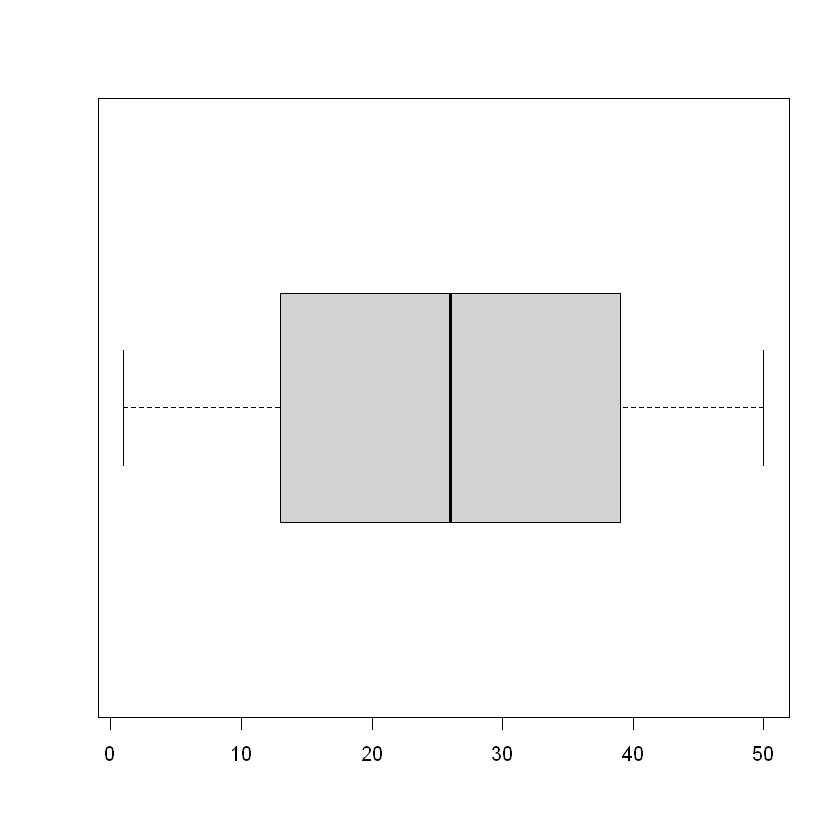

In [10]:
boxplot(dados, horizontal = TRUE)

**Limite Inferior:** O limite inferior em um boxplot é calculado como Q1 (primeiro quartil) - 1,5 * IQR (Intervalo Interquartil). Ele é representado por uma linha que estabelece o limite inferior além do qual um valor é considerado um valor atípico (outlier). Qualquer valor abaixo do limite inferior é considerado um possível outlier.  

**Limite Superior:** O limite superior em um boxplot é calculado como Q3 (terceiro quartil) + 1,5 * IQR (Intervalo Interquartil). Ele estabelece o limite superior além do qual um valor é considerado um valor atípico. Qualquer valor acima do limite superior é considerado um possível outlier e é frequentemente representado como um ponto no gráfico de boxplot.
## Os valores dos limites podem ser encontrados abaixo.

In [11]:
quartis[2,] - 1.5 * IQR(dados)  # acessando linha 2, há somente uma coluna
quartis[4,] + 1.5 * IQR(dados)  # Linha 4, há somente uma coluna

[1] -26

[1] 78

In [12]:
library(ggplot2) #Permite criar um gráfico mais personalizável

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


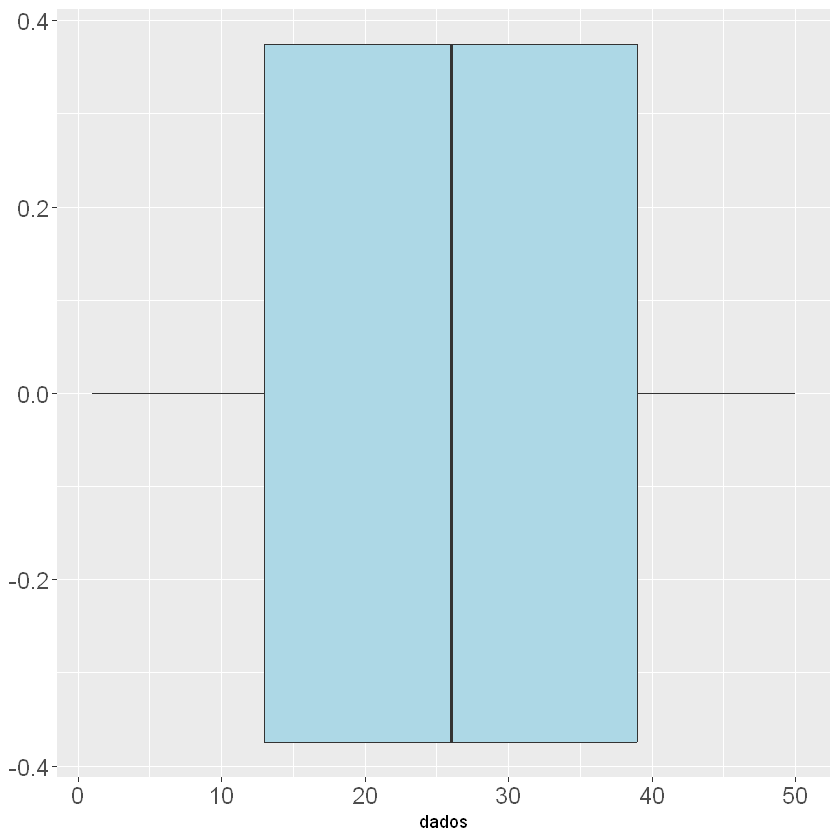

In [13]:
ggplot() + #argumento aes(y = Valores) especifica que os valores dos dados devem ser plotados no eixo y. 
  geom_boxplot(aes(y = dados), fill = 'lightblue') + 
  coord_flip() + # Inverte os eixos para criar o boxplot horizontal
 theme(axis.text.x = element_text(size = 14),  # Ajuste o tamanho dos números no eixo x
        axis.text.y = element_text(size = 14))  # Ajuste o tamanho dos números no eixo y

### Percentis são uma medida estatística que divide um conjunto de dados em 100 partes iguais. Eles são usados para entender a distribuição dos valores dentro de um conjunto de dados e identificar a posição relativa de um valor em relação aos outros valores.

In [14]:
quantile(dados, probs = 0.10) # 10º percentil
quantile(dados, probs = 0.90) #90º percentil.

10% 
  6

90% 
 46

## Medidas de Dispersão

### Variância 

**A variância é uma medida estatística que descreve o grau de dispersão ou variabilidade em um conjunto de dados. Ela nos ajuda a entender quão longe os valores individuais estão da média do conjunto de dados. Quanto maior a variância, mais dispersos estão os dados em relação à média, e quanto menor a variância, mais próximos os dados estão da média.**

A fórmula da variância é dada por:

**Variância(σ2)=   ∑(Xi−μ)² / N**  

Onde:   
σ² é a variância;  
Xi representa cada valor no conjunto de dados;
μ é a média dos valores;    
∑ representa a soma dos quadrados dos desvios dos valores Xi em relação à média µ.
N é o número de valores no conjunto de dados;  
                   
**Quando medimos a diferença entre a média de uma amostra e um valor individual (Xi - X), ao final, a soma das dos desvios será igual 0, para corrigir este problema calculamos o quadrado de cada desvio. Desta forma, a razão pela qual os desvios são elevados ao quadrado na fórmula da variância é para evitar que os desvios positivos e negativos se anulem.**

In [15]:
var(dados)

[1] 209.9059

## Desvio Padrão

**raiz quadrada da variância**


**Como mencionado anteriormente, a variância é medida em unidades ao quadrado, o que a torna menos intuitiva. Para obter uma medida mais interpretável, é comum calcular o desvio padrão, que é a raiz quadrada da variância. O desvio padrão tem as mesmas unidades que os dados originais e é uma medida que quantifica a dispersão dos dados de uma maneira mais compreensível.**

In [16]:
sd(dados)

[1] 14.48813

## Correção de Bessel

**A correção de Bessel é a prática de ajustar a estimativa da variância amostral usando N−1 graus de liberdade em vez de N, onde N é o tamanho da amostra. Ela é usada para estimar a variabilidade da população com base em uma amostra, tornando a estimativa menos enviesada.**

**Isto acorre porque a amostras tendem a ser valores no meio da população, especialmente em distribuições normais, assim a variabilidade destas amostras será menor do que a variabilidade da população inteira.**

**Desta forma, ao usarmos N-1 nas fórmulas da variância da amostra ou do desvio padrão da amostra, diminuímos o valor do denominador, tornando o resultado da variância ou do desvio padrão maior e mais representativo da população.** 

**Em R, quando você usa a função var() ou sd(), é aplicado por padrão a correção de Bessel, que utiliza N−1 no denominador para calcular a variância e o desvio padrão amostral.** 

In [17]:
#Para calcular a variância populacional em R, você pode usar a função var() e depois multiplicar o resultado pela razão 
# (N-1)/N, onde N é o Tamanho da amostra
N <- length(dados)  # Tamanho da amostra
var(dados) * (N-1)/N

[1] 209.696

In [18]:
#É possível criar uma função para calculo da variância populacional 

var.p <-function(x)
    {N <- length(x) 
var_pop <- var(x) * (N-1)/N
      return(var_pop)
}

In [19]:
var.p(dados)

[1] 209.696

In [20]:
#Desvio padrão populacional
sqrt(var(dados) * (N-1)/N)

[1] 14.48088

In [21]:
#Também podemos criar uma função para o calculo do desvio padrão populacional

sd.p <- function(x)
    {N <- length(x)
var_pop <-var(x) * (N-1)/N
sd_pop <- sqrt(var_pop)
    return(sd_pop)}

In [22]:
sd.p(dados)

[1] 14.48088

### O coeficiente de variação (CV) é uma medida estatística que expressa a variabilidade de um conjunto de dados como uma porcentagem da média. Ele é usado para avaliar a dispersão relativa dos dados e é especialmente útil ao comparar a variabilidade entre conjuntos de dados com médias diferentes. O CV é uma medida de variabilidade relativa, normalizando a variância pelo valor médio.

**A fórmula para calcular o coeficiente de variação é a seguinte:**

**CV=(σ/μ)×100%**

**Onde:  
CV é o coeficiente de variação;    
σ é o desvio padrão (pode ser o desvio padrão amostral ou populacional);   
μ é a média dos dados.**  


In [23]:
#Função para calculo do coeficiente de variação amostral:

cv <- function(x)
    {desvio <-sd(x)
media<- mean(x)
coefi_var <-(desvio/media)*100
     return(coefi_var)}

In [24]:
cv(dados)

[1] 55.71929

In [25]:
# Função para calculo do coeficiente de variação populacional. 
cv.p <- function(x)
    {N <- length(x)
desvio <-sqrt(var(x) * (N-1)/N)
media<- mean(x)
coefi_var_pop <-(desvio/media)*100
     return(coefi_var_pop)}

In [26]:
cv.p(dados)

[1] 55.69142

## Trabalhando com uma variável

In [27]:
# Gerando uma massa de dados com uma distribuição normal em R
# Função rnorm() gera uma amostra de dados
dados1 <- rnorm(1000, mean = 0, sd = 1)

### Histogramas são frequentemente usados para representar a frequência de valores em um conjunto de dados.

### Eles são uteis para verificar a distribuição dos dados.

### Histogramas são uma ferramenta gráfica que exibe a distribuição de dados ao longo de intervalos contínuos ou classes (chamados de "bins" ou "intervalos") em um eixo horizontal, com a contagem (ou densidade) de observações em cada classe representada no eixo vertical.

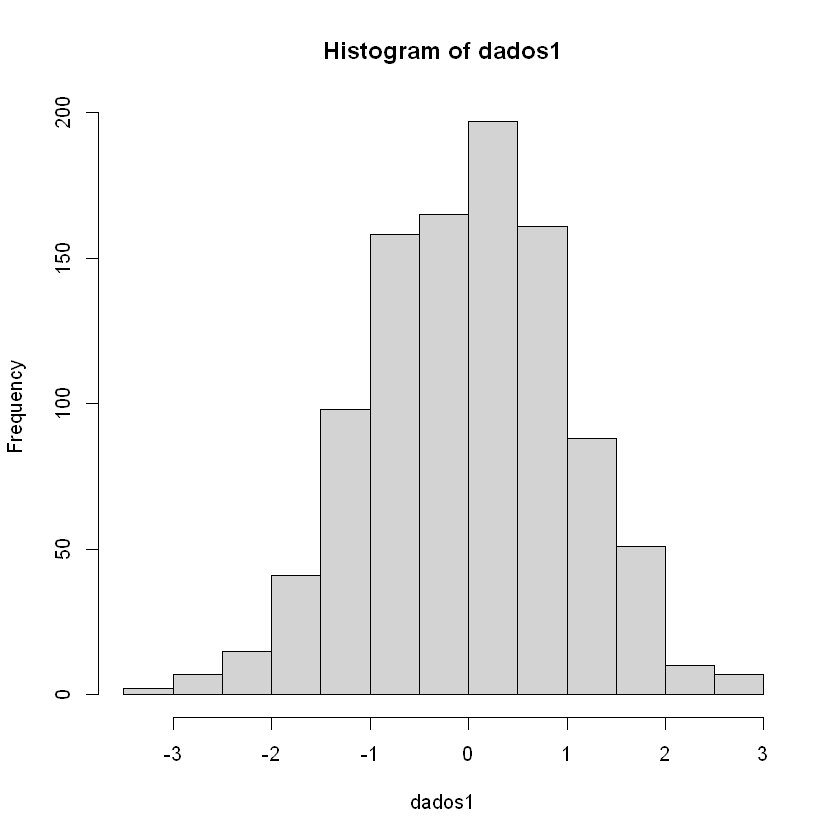

In [28]:
hist(dados1)

In [29]:
# Fornece funções para calcular momentos estatísticos, como média, variância, assimetria e curtose, de uma amostra de dados.
library(moments)

### O coeficiente de assimetria é o que permite dizer se uma determinada distribuição é assimétrica ou não.

**O coeficiente de assimetria, também conhecido como medida de assimetria, é uma estatística descritiva que quantifica o grau de assimetria na distribuição de dados. Ele é usado para avaliar se uma distribuição de dados é simétrica, assimétrica positiva (à direita) ou assimétrica negativa (à esquerda). A assimetria em uma distribuição refere-se a como os valores se distribuem em relação à média.**

S= 3(μ−M)/σ  

Onde:  
S é a medida de assimetria.  
μ é a média da amostra.  
M é a mediana da amostra.  
σ é o desvio padrão da amostra.


S>0, a distribuição é assimétrica positiva (inclinada para a direita);  
S<0, a distribuição é assimétrica negativa (inclinada para a esquerda);  
S=0, a distribuição é simétrica;  

In [30]:
skewness(dados1)

[1] -0.0581289

**Se o coeficiente de assimetria for igual a 0, a distribuição é simétrica. Isso significa que os valores estão igualmente distribuídos em ambos os lados da média, e a curva da distribuição terá uma forma aproximadamente em sino.**

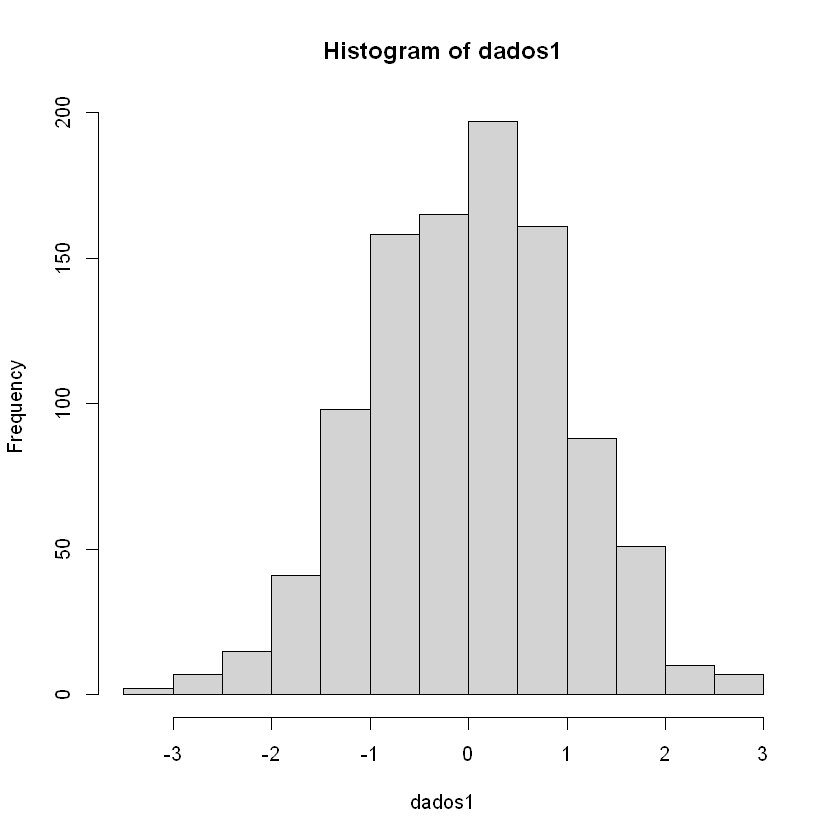

In [31]:
#Distribuição simétrica
hist(dados1)

**Se o coeficiente de assimetria for maior que 0, a distribuição é assimétrica positiva (à direita). Isso indica que a cauda direita da distribuição é mais longa, e a maioria dos valores está concentrada à esquerda da média.** 

![assimetricapositiva](assime.posi.jpg)

**Se o coeficiente de assimetria for menor que 0, a distribuição é assimétrica negativa (à esquerda). Isso indica que a cauda esquerda da distribuição é mais longa, e a maioria dos valores está concentrada à direita da média.**

![assimetrica.negativa](assime.nega.jpg)

### O coeficiente de curtose, também conhecido como medida de curtose, é uma estatística que descreve a forma da distribuição de probabilidade de um conjunto de dados. Ele mede o grau de achatamento ou agudeza da curva da distribuição. Em outras palavras, a curtose indica quão "pesadas" ou "leves" são as caudas da distribuição em relação à sua parte central.

### Desta forma, o coeficiente de curtose é uma medida que caracteriza o achatamento da curva da função de distribuição.

![curtose](08-curtose.jpeg)

In [32]:
kurtosis(dados1)

[1] 2.914938

**CK ≈ 0: Distribuição normal. Chamada de Curtose Mesocúrtica.**    
**CK < 0: Cauda mais leve que a normal. Para um coeficiente de Curtose negativo, tem-se uma Curtose Platicúrtica.    
CK > 0: Cauda mais pesada que a normal. Para um coeficiente de Curtose positivo, tem-se uma Curtose Leptocúrtica.**  

**O coeficiente de curtose é igual a 2.37652. Logo, como o valor de CK é maior que 0, a curva é Leptocúrtica. Isso significa que a curva tem caudas mais pesadas e um pico mais pronunciado do que a curva normal.**

## Construção de um histograma com ggplot para visualizar a distribuição dos dados

1 - É necessário criar um data frame a partir de um vetor de dados para que possamos usar esses dados em conjunto com a biblioteca ggplot2, **que espera que os dados estejam em um formato de data frame ou tibble.**  
2-  A função ggplot() recebe dois argumentos principais: o primeiro é o conjunto de dados (neste caso, "datasim") e o segundo é a estética (aes), que define como as variáveis são mapeadas nos elementos do gráfico. Neste código, estamos mapeando a variável "dados1" no eixo x.
3 - binwidth = 2 significa que os intervalos do histograma terão uma largura de 2 unidades.  
4 - A função geom_histogram cria as barras do histograma. O argumento aes(y = ..density..) mapeia o eixo y para a densidade em vez da contagem. Além disso, define a cor de preenchimento das barras como vermelho com uma transparência de 0,5.  
5 - geom_density(colour = 'blue'): estamos adicionando uma camada de gráfico de densidade ao gráfico. O gráfico de densidade mostra a estimativa da densidade de probabilidade dos dados. A cor das linhas de densidade é definida como azul.  
6 - xlab(expression(bold('Dados'))) + ylab(expression(bold('Densidade'))): Esamos configurando os rótulos dos eixos x e y do gráfico. Estamos usando a função expression para definir rótulos em negrito. O eixo x é rotulado como "Dados" e o eixo y como "Densidade".

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


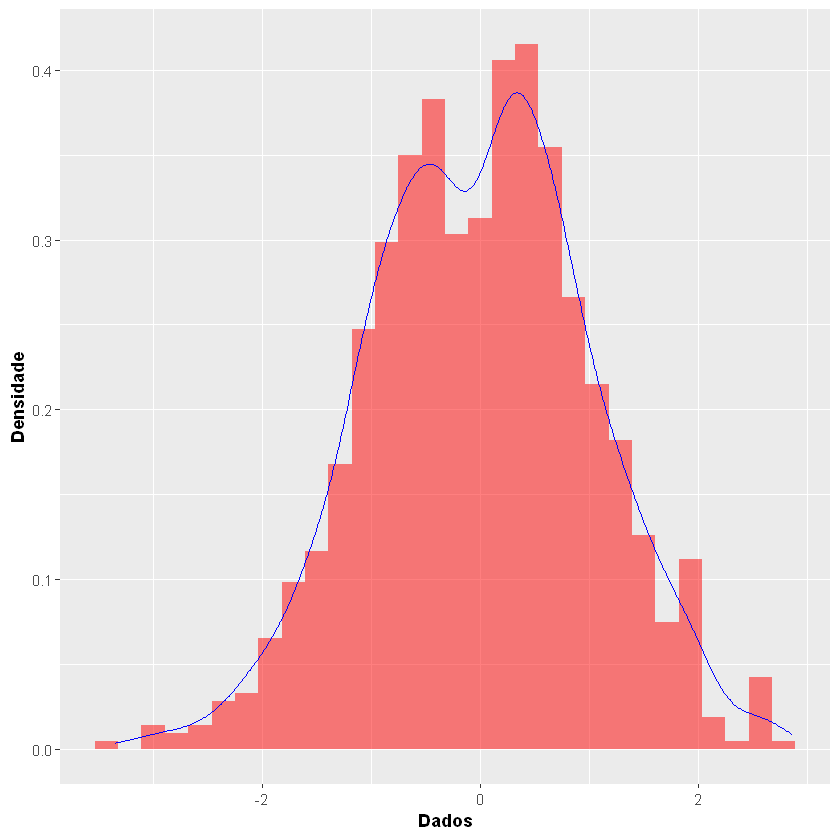

In [33]:
# Histograma com ggplot2
datasim <- data.frame(dados1) #Criando um data frame. 
ggplot(datasim, aes(x = dados1), binwidth = 2) + #Informando os argumentos necessários, bins com largura de 2 unidades.
  geom_histogram(aes(y = ..density..), fill = 'red', alpha = 0.5) + #Eixo y= densid.; preenchimen.= vermelho; transpar.= 0,5
  geom_density(colour = 'blue') +  #densidade de probabilidade dos dados e azul
xlab(expression(bold('Dados'))) + # Rótulo eixo x
  ylab(expression(bold('Densidade')))# Rótulo eixo y

## Trabalhando com duas variáveis
## Covariância 

A covariância entre duas variáveis (X, Y) é uma medida de variabilidade conjunta dessas duas variáveis aleatórias. Quando a covariâncias entre essas variáveis é positiva os dados apresentam tendência positiva na dispersão. Quando o valor da covariância é negativo, o comportamento é análogo, no entanto, os dados apresentam tendências negativas.Covariância é uma medida de como as alterações em uma variável estão associadas a mudanças em uma segunda variável. **Especificamente, a covariância mede o grau em que duas variáveis estão linearmente associadas. Ela mede como as duas variáveis tendem a variar juntas.** No entanto, também é frequentemente usado informalmente como uma medida geral de como duas variáveis são monotonicamente relacionadas. 

## Coeficiente de Correlação 

**A correlação é uma medida padronizada da relação linear entre duas variáveis.** Ela é uma versão em escala de covariância que assume valores em [−1,1] com uma correlação de ± 1 indicando associação linear perfeita e 0 indicando nenhuma relação linear. Esse escalonamento torna a correlação invariante às mudanças na escala das variáveis originais. A constante de escala é o produto dos desvios padrão das duas variáveis. **Portanto, o Coeficiente de Correlação p mede o grau de correlação entre duas variáveis.** 

Para p = 1, tem-se uma correlação perfeita entre as duas variáveis.   
Se p = - 1, há uma correlação perfeita entre as variáveis, no entanto, essa correlação é negativa.   
Caso p = 0, as duas variáveis não dependem linearmente uma da outra.  

Para p = -1 indica uma forte correlação negativa: isso significa que toda vez que x aumenta, y diminui;     
Para p = 0 significa que não há associação entre as duas variáveis (x e y);     
Para p = 1 indica uma forte correlação positiva: isso significa que y aumenta com x.     

## Interpretação:

**Covariância:** A covariância indica se **duas variáveis tendem a se mover juntas (covariância positiva) ou se movem em direções opostas (covariância negativa)**. No entanto, a magnitude da covariância não fornece informações claras sobre a força da relação. 

**Correlação:** O coeficiente de correlação fornece uma interpretação mais clara e padronizada da relação linear. Um coeficiente de correlação próximo de -1 ou 1 indica uma forte correlação linear, enquanto um coeficiente próximo de 0 indica que não há correlação linear. Desta forma, a correlação é uma medida padronizada que descreve a força e a direção da relação linear entre variáveis. 

**Iremos agora analisar a covariância e correlação entre as variáveis milhas/galão e peso do veículo no dataset mtcars.**

In [34]:
#O conjunto de dados "mtcars" faz parte da instalação padrão do R.
my_data <- mtcars
my_data

# mpg= milhas por galão;
# Wt = peso dos carros em tonelados;

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [35]:
# Cria gráficos estatísticos.
# Apresenta função ggscatter () para criar um gráfico de dispersão com o ggplot. 
library("ggpubr")

Warning message:
"package 'ggpubr' was built under R version 4.2.3"


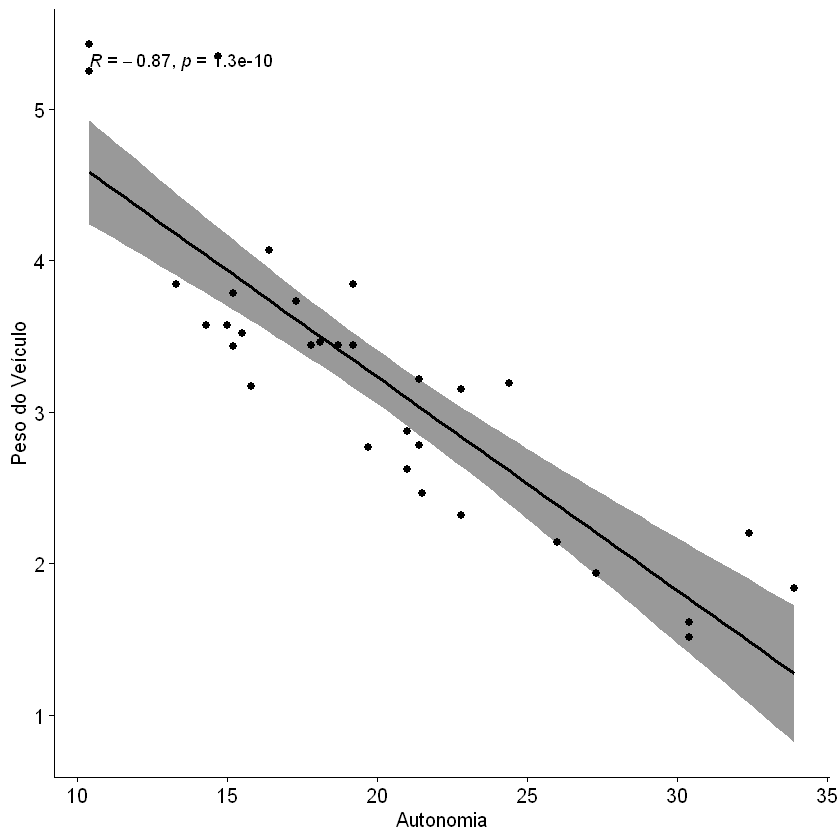

In [36]:
ggscatter(my_data, x = "mpg", y = "wt", #Conjunto de dados, eixo x e y;
          add = "reg.line", conf.int = TRUE, #adiciona linha de regressão; conf.int=TRUE: incluirá intervalos de confiança;
          cor.coef = TRUE, # cor.coef = TRUE:adiciona o coeficiente de correlação ao gráfico.
          cor.method = "pearson", # Especifica o método de cálculo do coeficiente de correlação. 
          xlab = "Autonomia", ylab = "Peso do Veículo") #Define rótulos para os eixos x e y

Por meio do gráfico de dispersão podemos verificar que conforme aumenta o peso do veículo, menor é sua autonomia, ou seja,  carros mais pesados consomem mais combustível por quilômetro percorrido. O gráfico demonstra uma correlação negativa entre as duas variáveis.

In [37]:
# Definindo x e y
x = my_data$mpg
y = my_data$wt

In [38]:
#Correlação
cor(x, y)

[1] -0.8676594

## Distribuições de probabilidades

O R inclui funcionalidades para operações com distribuições de probabilidades. Para cada distribuição há 4 operações básicas indicadas pelas letras:  

- d: calcula a densidade de probabilidade f(x) no ponto
- p: calcula a função de probabilidade acumulada F(x) no ponto
- q: calcula o quantil correspondente a uma dada probabilidade
- r: retira uma amostra da distribuição

Para utlizar as funções combina-se uma das letras acima com uma abreviatura do nome da distribuição. **Por exemplo, para calcular probabilidades usamos: pnorm para normal, pexp para exponencial, pbinom para binomial, ppois para Poisson e assim por diante.**


### d: Função de Densidade de Probabilidade (PDF)

dnorm, dexp, dbinom, dpois, etc...

**A função d- é usada para calcular a densidade de probabilidade (PDF) de uma variável aleatória em um ponto específico. Ela fornece a probabilidade de que a variável aleatória assuma um valor exato.**

- Ex.: dnorm(x, mean = 0, sd = 1)  
- <- dnorm(2, mean = 3, sd = 0.5)

**Neste exemplo, estamos vericando a probabilidade de que uma variável aleatória normal com média 3 e desvio padrão 0,5 assuma o valor exato de 2.**

### p: Função de Probabilidade Acumulada (CDF) 

pnorm, pexp, pbinom, ppois, etc..

**A função p- é usada para calcular a função de probabilidade acumulada (CDF) de uma variável aleatória. Ela fornece a probabilidade de que a variável aleatória seja menor(lower.tail = TRUE), maior(lower.tail = FALSE) ou igual a um valor específico.**

- Ex.:pnorm(q, mean = 0, sd = 1, lower.tail = TRUE)
- pnorm(2, mean = 3, sd = 0.5)  

**Neste exemplo,estamos verificando a probabilidade de que uma variável aleatória normal com média 3 e desvio padrão 0,5 seja menor ou igual a 2.**

### q:Quantil

qnorm, qexp, qbinom, qpois, etc..

**A função q- é usada para calcular o quantil (percentil) de uma distribuição. Em outras palavras, ela permite encontrar o valor no qual uma variável aleatória tem uma probabilidade acumulada específica. A função q- é frequentemente usada em estatísticas para calcular valores críticos em distribuições e encontrar percentis específicos. É útil para responder perguntas como "qual é o valor que representa o limite superior de 95% dos dados nesta distribuição?" ou "qual é o valor a partir do qual apenas 10% dos dados são maiores**

- Ex.:qnorm(p, mean = 0, sd = 1, lower.tail = TRUE)
- qnorm(0.95, mean = 3, sd = 0.5)

**Neste exemplo, estamos verificando o valor que separa os 95% inferiores da distribuição normal com média 3 e desvio padrão 0.5 dos 5% superiores. Em outras palavras, é o valor no qual 95% dos dados estão abaixo e 5% estão acima na distribuição normal especificada.**

### r: Geração de Amostras Aleatórias

rnorm, rexp,rbinom, rpois, etc..

**A função r-é usada para gerar amostras aleatórias de uma distribuição com os parâmetros especificados. Ela gera uma amostra de valores aleatórios seguindo a distribuição desejada.**

- Ex.: rnorm(n, mean, sd)
- Onde n é o tamanho da amostra e mean e sd são parâmetros opcionais relacionados à média e desvio padrão, respectivamente.

## Distribuições de Probabilidade Discreta

### Distribuição Binomial

**Uma variável aleatória tem Distribuição Binomial quando o experimento ao qual está relacionada apresenta apenas 2 resultados: sucesso e fracasso.**

Vamos imaginar que nosso experimento seja contar quantos clientes que entram em uma loja de celulares, adquirem um plano pós-pago.Para este experimento, temos 2 possibilidades para cada observação: adquirir ou não adquirir o plano.Como podemos ter apenas 2 resultados possíveis, este é chamado um Experimento Binomial.  

Vamos imaginar agora, que historicamente, 10% dos clientes que entram na loja, adquirem um plano pós-pago. Portanto, a probabilidade de sucesso (que vamos chamar de p) para cada observação é 0.10. E a probabilidade de falha (que vamos chamar de q) para cada observação é 0.90. Ou seja: p = 1 – q 

- p = probabilidade de sucesso
- q = probabilidade de fracasso 

Outra característica da distribuição binomial, é que cada observação é independente das outras. Dessa forma, um Experimento Binomial consiste de um número fixo de observações, indicado por n e contamos o número de sucessos, indicado por x.  

- A Média de uma Distribuição Binomial, representa a média de longo prazo de sucessos esperados, baseado no número de observações.
- A Variância de uma Distribuição Binomial, representa a variação que existe no número de sucessos (p) sobre um número (n) de observações.


**Exemplo:** A probabilidade de um paciente com um ataque cardíaco morrer do ataque é de 0.04, (ou seja, 4 de 100 morrem do ataque).   
Suponha que tenhamos 5 pacientes que sofrem um ataque cardíaco, qual é a probabilidade de que todos sobrevivam? 

Para este exemplo, vamos chamar um sucesso um ataque fatal (p = 0.04). Temos n = 5 pacientes e queremos saber a probabilidade de que todos sobrevivam ou, em outras palavras, que nenhum seja fatal (0 sucessos).  

 - X = Número de sobreviventes ao ataque
 - p = 0.04
 - n = 5
 - dbinom(X, n, p)  
 
 
A **função "dbinom"** em R é uma função específica da linguagem de programação R usada para calcular a probabilidade de uma variável aleatória discreta seguir uma distribuição binomial. **Ela permite calcular a probabilidade de obter um número específico de sucessos em um determinado número de tentativas.
 - dbinom(x, size, prob): 
 - x: O número de sucessos desejado.
 - size: O número total de tentativas.
 - prob: A probabilidade de sucesso em uma única tentativa.


In [39]:
# 0 sucesso, ou seja, nenhum, fatal;
# Número de pacientes;
# Prababilidade de um paciente com pcr vir á óbito.
dbinom(0, 5, 0.04)

[1] 0.8153727

Aproximadamente 82% de chances que os pacientes em pcr sobrevivam. 

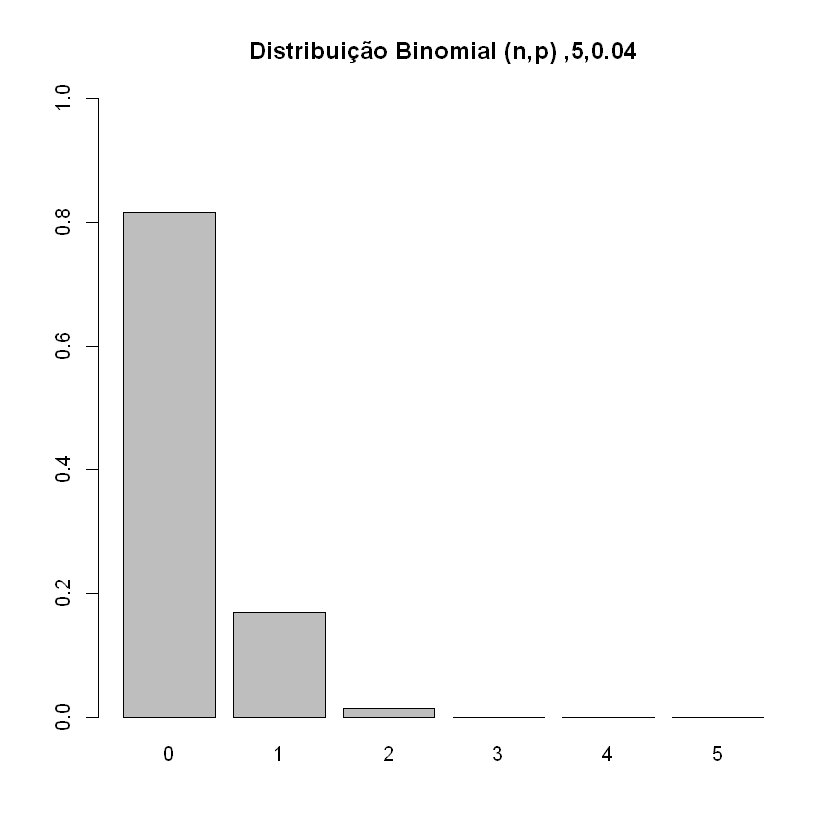

In [40]:
# Desenhando a distribuição de probabilidades
# Criando uma função que aceita dois argumentos, n(número de tentativas) e p (probabilidade). 
graph <- function(n,p){
  x <- dbinom(0:n, size = n, prob = p) #dbinom calcula as probabilidades p/ todos os valores possíveis de sucesso de 0 a n.
  barplot(x,ylim=c(0,1),names.arg=0:n, #cria um gráfico de barras das probabilidades calculados;
          
          #x: O vetor de probabilidades calculadas;
          #ylim: O limite do eixo y, definido como indo de 0 a 1;
          #names.arg: Os rótulos no eixo x, que são os valores de sucesso de 0 a n.
          
          main=sprintf(paste('Distribuição Binomial (n,p) ',n,p,sep=',')))
}#O título do gráfico, que inclui os valores de  n e  p.

graph(5,0.04) #Chamando a função graph para criar o gráfico

### Aplicação da pbinon

**Suponha que haja 12 questões de múltipla escolha em um questionário de inglês. Cada questão tem cinco respostas possíveis e apenas uma delas está correta. Encontre a probabilidade de ter quatro ou menos respostas corretas se um aluno tentar responder a cada pergunta aleatoriamente.**


In [41]:
# Como apenas uma das cinco respostas possíveis está correta, a probabilidade de responder corretamente 
# a uma pergunta aleatória é 1/5 = 0,2.
#0,2= Sucesso
# Podemos agora então usar utilizar a função de probabilidade acumlada.
pbinom(4, size=12, prob=0.2)

[1] 0.9274445

### Distribuição Poisson

**A Distribuição Poisson é muito útil para calcular a probabilidade de um certo número de eventos que ocorrerá em um específico intervalo de 'tempo ou espaço'.** 

Nós poderíamos usar este tipo de distribuição para determinar a probabilidade de 10 clientes entrarem em uma loja nos próximos 30 minutos ou a probabilidade de 2 acidentes de carro ocorrerem em um determinado cruzamento no próximo mês.   

A Distribuição Poisson é um modelo para o número de eventos observados numa unidade de tempo ou de espaço, dado que a taxa de eventos por unidade é constante e os eventos ocorrem de modo independente. 

**Desta forma, ela é frequentemente usada para descrever a probabilidade de eventos que ocorrem de forma independente e a uma taxa média constante ao longo de um intervalo específico.**

O único parâmetro da Poisson é λ (lambda), que representa a taxa de eventos por unidade de medida (tempo, espaço, etc.)  
**Ou seja, λ é o número médio de eventos que se espera ocorrer em um determinado intervalo ou unidade.**

- Distribuição Binomial, o número de sucessos observados é limitado ao número de possibilidades.
- Distribuição Poisson, o número de resultados pode ser qualquer um.
- A Distribuição Poisson não conta o número de sucessos, como na distribuição binomial.
- A Distribuição Poisson conta o número de ocorrências de um evento particular sobre um intervalo específico de tempo ou espaço.   

A **função dpois** em R é uma função que calcula a função de probabilidade de massa da Distribuição de Poisson para um conjunto de valores específicos.
A sintaxe básica da função dpois é a seguinte:  
- dpois(x, lambda);
- x: O valor para o qual você deseja calcular a probabilidade;
- lambda: O parâmetro λ (lambda), que representa a taxa de eventos por unidade;

A função dpois retornará a probabilidade de obter o valor x na Distribuição de Poisson com parâmetro λ.

**Exemplo: Considere um processo que têm uma taxa de 0,5 defeitos por unidade. Qual a probabilidade de um processo apresentar duas unidades defeituosas? E apresentar nenhum defeito?**

In [42]:
# Probabilidade de um processo apresentar defeitos em duas unidades, sendo que a taxa é 0,5 defeitos por unidade em um processo.
dpois(2, 0.5)

[1] 0.07581633

In [43]:
# Probabilidade de um processo apresentar nenhum defeito, sendo que a taxa é 0,5 defeitos por unidade em um processo.
dpois(0, 0.5)

[1] 0.6065307

### Aplicação da ppois

**Se houver 12 carros atravessando uma ponte por minuto, em média, encontre a probabilidade de ter 15 ou mais carros cruzando a ponte em um determinado minuto. Ea probabilidade de ter 14 ou menos carros atravessando a ponte em um determinado minuto**
ppois(q, lambda, lower.tail = TRUE)

In [44]:
#Quinze carros ou mais
ppois(15, lambda=12, lower.tail = FALSE)  # upper tail 

[1] 0.1555843

In [45]:
#14 ou menos carros
ppois(14, lambda=12)   # lower tail 

[1] 0.7720245

## Distribuições de Probabilidade Contínua

### Distribuição  Normal

**A Distribuição Normal, ou Gaussiana, é a mais importante distribuição contínua.Ela é caracterizada por sua forma de sino e é amplamente utilizada para modelar uma variedade de fenômenos na natureza, ciência e estatística**

A Distribuição Normal é definida pelos seguintes parâmetros:
 - Média (μ): Representa o centro da distribuição, onde a curva atinge seu ponto mais alto. Define o valor médio da variável aleatória.
 - Desvio Padrão (σ): Controla a dispersão dos valores em relação à média. Quanto maior o desvio padrão, mais espalhados estão os valores.

As principais características da Distribuição Normal são:

- Simetria: A distribuição é simétrica em relação à média, o que significa que metade dos valores está à esquerda da média e metade à direita.
- Sino: A curva tem a forma de um sino, com seu ponto máximo na média.
- Infinidade de Valores Possíveis: A distribuição abrange todos os valores reais de menos infinito a mais infinito.
- **Teorema do Limite Central: A média de amostras de variáveis aleatórias independentes e idênticas, quando suficientemente grandes, segue uma Distribuição Normal, independentemente da distribuição original das variáveis.**


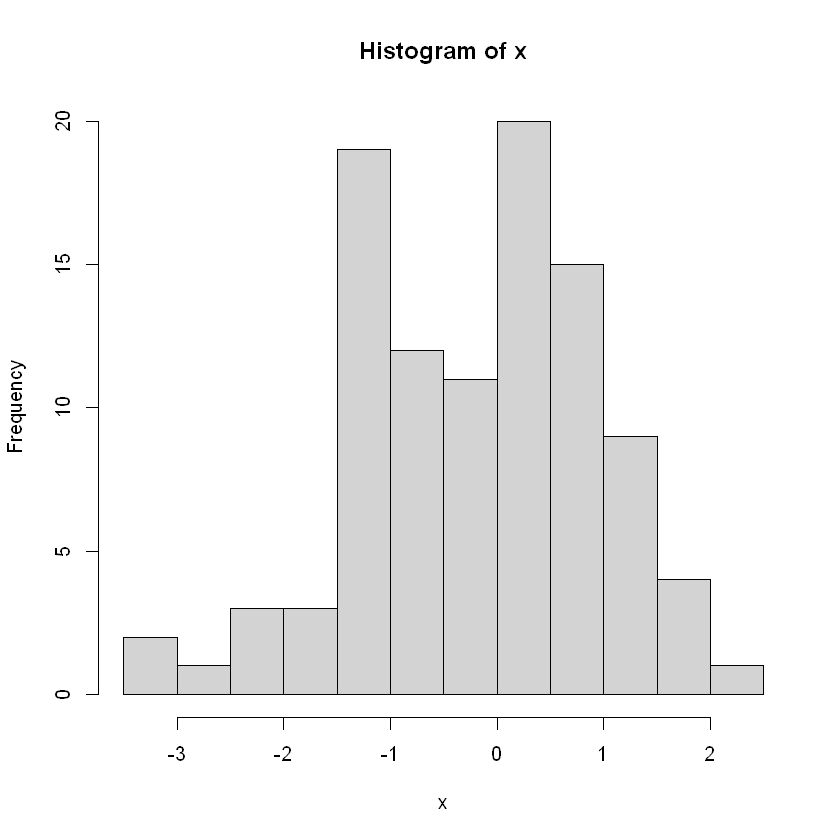

In [46]:
# Distribuição Normal, 'r 'norm'
x <- rnorm(100)
hist(x)

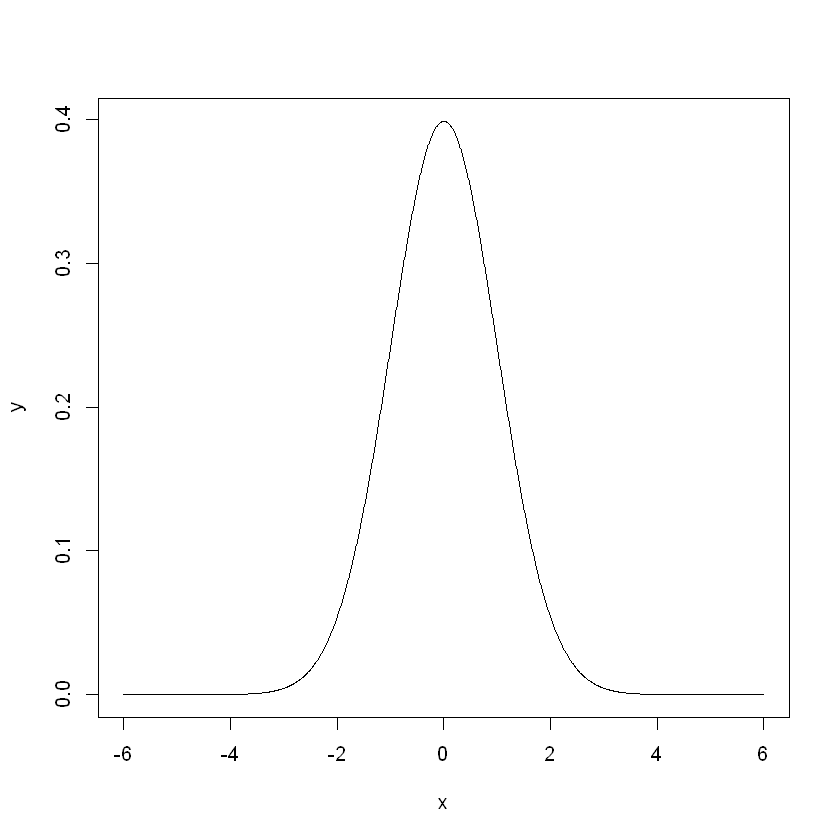

In [47]:
# Densidade
# # Observe que o gráfico gerado assemelha-se a uma Gaussiana e não apresenta assimentria. 
# Quando o gráfico da distribuição possui tal forma, há grandes chances de se tratar de uma distribuição normal.
x <- seq(-6, 6, by=0.01) #Sequencia de valores de -6 à 6, saltando de 0,01.
y <- dnorm(x) #função de densidade
plot(x, y, type="l")

In [48]:
#Criando dados aleatórios: 1000 números, média 3, desvio 0,25
x <- rnorm(1000,3,0.25)

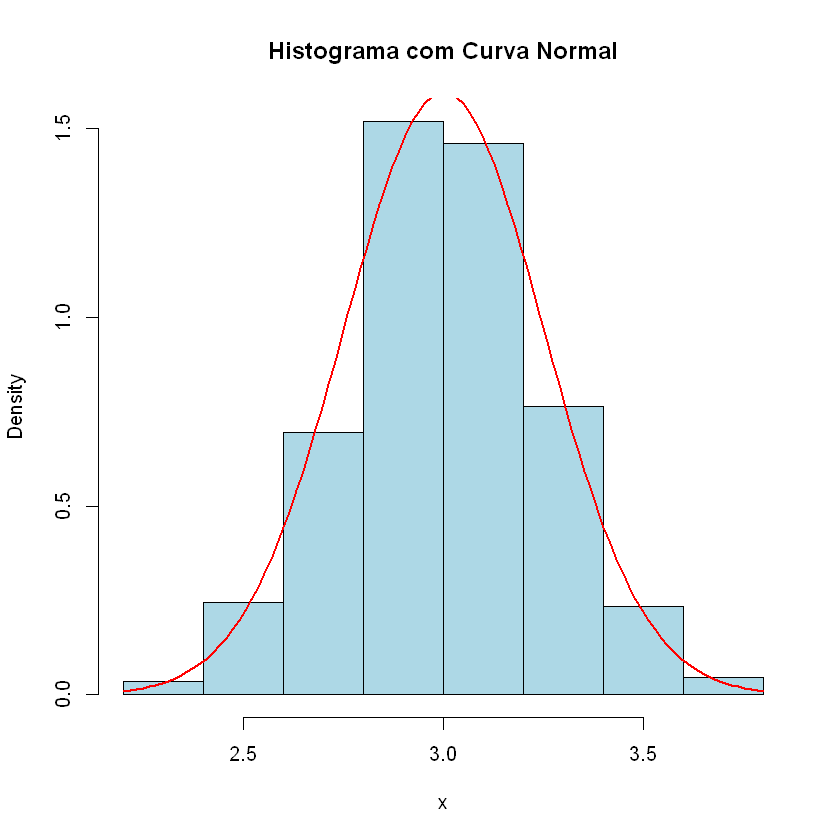

In [49]:
#Criando histograma dos dados gerados no item anterior e adicionando uma camada com a curva da normal.

# Criando o histograma
hist(x, prob = TRUE, col = "lightblue", main = "Histograma com Curva Normal")
#prob = TRUE: significa que o histograma será convertido em uma função de densidade de probabilidade

# Adicionando a curva da distribuição normal
curve(dnorm(x, 3, 0.25), col = "red", lwd = 2, add = TRUE)
#curve(...): Esta função é usada para adicionar uma curva a uma plotagem em R.

#dnorm(x, 3, 0.25): É usada para calcular os valores da função de densidade de probabilidade da distribuição normal.
#Ela é calculada para o vetor x com uma média de 3 e um desvio padrão de 0.25. 
#Isso cria uma curva que representa a distribuição normal teórica com esses parâmetros.

#lwd = 2, largura da linha

#add = TRUE: O argumento add é definido como TRUE, indicando que a curva deve ser adicionada à plotagem existente -histograma

### Aplicação da pnorm

**Suponha que os resultados dos testes de um vestibular se ajustem a uma distribuição normale a pontuação média do teste é de 72 e o desvio padrão é de 15,2. Qual é a porcentagem de alunos que pontuaram 84 ou mais no exame?**

**pnorm(q, mean = 0, sd = 1, lower.tail = TRUE)**

Aqui estão os principais argumentos da função pnorm:
- **q:** O valor para o qual você deseja calcular a probabilidade acumulativa;
- **mean:** A média da distribuição normal. O padrão é 0;
- **sd:** O desvio padrão da distribuição normal. O padrão é 1;
- **lower.tail:** Um valor lógico que determina se você deseja calcular a probabilidade acumulativa para a cauda esquerda (se TRUE) ou a cauda direita (se FALSE) da distribuição. **O padrão é TRUE, o que significa que a probabilidade acumulativa para valores menores que q será calculada.**

In [50]:
pnorm(84, mean=72, sd=15.2, lower.tail=FALSE) 

[1] 0.2149176

21% de chance dos alunos pontuarem 84 ou mais neste exame. 

## Testes Estatísticos: Teste de Shapiro-Wilk, Teste F e Teste t

Para explicar os fundamentos básicos dos três testes descritos acima, iremos utilizar o Dataset **'Sleep'**, disponível  no  pacote datasets no R. Esse  dataset  é  resultado  de  um  trabalho  de  pesquisa  com  pacientes que  possuem dificuldades para dormir. Os pacientes foram separados em 2 grupos sendo que a cada grupo foi administrado um medicamento distinto com o objetivo de tratar distúrbios do sono e promover o aumento do tempo de sono.

**O dataset possui 3 variáveis:**
- extra–Variável numérica que indica quantas horas a mais ou a menos o paciente dormiu após receber o medicamento. Esta será a nossa variável dependente. 
- group–Variável do tipo fator (categórica) que indica o medicamento usado pelo paciente (1 ou 2).Esta será a nossa variável independente.
- ID–Identificação do paciente

**Nosso objetivo é responder a seguinte pergunta: 'Existe diferença significativa na média de sono dos 2 grupos de pacientes, ou seja, há diferença significativa entre os dois tipos de medicamento?'**

## Teste t

O teste t, também conhecido como o Teste t de Student, **é uma ferramenta estatística amplamente utilizada para comparar as médias de duas amostras (para mais de duas médias usamos a ANOVA) e determinar se as diferenças entre elas são estatisticamente significativas**

Como temos duas amostras (dois grupos), podemos aplicar o **Teste t** para responder à pergunta. 

Definimos assim as hipóteses para nosso teste:
- H0 (Hipótese Nula) =Não há diferença significativa entre as médias dos 2 grupos
- HA (Hipótese Alternativa) =Há diferença significativa entre as médias dos 2 grupos.
	
A interpretação do resultado do Teste t ajudará a definir se devemos ou não rejeitar a H0 e responder a pergunta de negócio deste estudo de caso. 

**Mas para aplicar o Teste t, primeiro precisamos validar suas suposições e para isso precisamos do Teste de Shapiro-Wilke do Teste F.**


## Shapiro-Wilk

**O Teste de Shapiro-Wilk tem como objetivo avaliar se uma distribuição é semelhante a uma distribuição normal**.Precisamos do Teste de Shapiro-Wilk para este estudo de caso pois uma das suposições do Teste t é que os resíduos seguem uma distribuição normal(simplificando: os dados seguem uma distribuição normal). Logo, validamos a suposição com o Teste de Shapiro-Wilk antes de aplicar o Teste t.

**Assim  como  a  maioria  dos  testes  estatísticos,  o  Teste  de  Shapiro-Wilk  formula  duas hipóteses:**
- H0(Hipótese Nula)= Os dados seguem uma distribuição normal.
- HA (Hipótese Alternativa)= Os dados não seguem uma distribuição normal.

## Teste F

**O teste F é projetado para comparar a variabilidade (ou dispersão) entre dois ou mais grupos. Ele é frequentemente usado para determinar se as variâncias desses grupos são estatisticamente diferentes.** Desta forma, o teste F é projetado para comparar a variabilidade (ou dispersão) entre dois ou mais grupos. Ele é frequentemente usado para determinar se as variâncias desses grupos são estatisticamente diferentes. 

**E por que precisamos do Teste F para este estudo de caso?**

Porque  uma  das  suposições  do  Teste  t  é  que  as  médias  das  amostras  têm  a  mesma variância (ou que não há diferença significativa na variância das médias). Vamos aplicar um Teste F  para  comparar  as  variâncias das  amostras  (extraídas  de  uma  população  normalmente distribuída). 

**Hipóteses do Teste F:**
- H0(Hipótese Nula)= As médias de dados extraídos de uma população normalmente distribuída têm a mesma variância.
- HA (Hipótese Alternativa)= As  médias  de  dados  extraídos  de  uma  população normalmente distribuída não têm a mesma variância.

**Antes de aplicar o Teste t primeiro precisamos validar as 5 suposições do Teste.**
- 1: Os dados são aleatórios e representativos da população.
- 2: A variável dependente é contínua.
- 3: Ambos os grupos são independentes (ou seja, grupos exaustivos e excludentes).
- 4: Os resíduos do modelo são normalmente distribuídos.
- 5: A variância residual é homogênea (princípio da homocedasticidade).

Para o nosso exemplo neste estudo de caso, iremos considerar como verdadeiras as suposições de 1 a 3 e validaremos as suposições 4 e 5. Para a suposição 4 usaremos o Teste de Shapiro-Wilk e para a suposição 5 usaremos o Teste F.

Conforme já explicado anteriormente o **Teste de Shapiro-Wilk** é usado antes do Teste t em alguns casos para verificar se os dados seguem uma distribuição normal. A razão para isso é que o Teste t assume que os dados seguem uma distribuição normal. Quando os dados não seguem uma distribuição normal, a aplicação do Teste t pode ser inadequada e fornecer resultados imprecisos.

Além disto, uma das suposições do Teste t é que as médias das amostras têm a mesma variância (ou que não há diferença significativa na variância entre as médias). Isso é conhecido como a suposição de igualdade de variâncias. A ideia por trás dessa suposição é que, se as variâncias entre as amostras forem muito diferentes, pode afetar a validade do Teste t. 

O princípio que estamos discutindo é conhecido como o princípio da homocedasticidade. A homocedasticidade se refere à suposição de que as variâncias das diferentes amostras (ou grupos) são iguais, ou seja, as variações em torno das médias são consistentes em todos os grupos. Isso é uma parte importante das suposições para a aplicação adequada do Teste t. Portanto, **o Teste F** é frequentemente usado para verificar a homocedasticidade, testando se as variâncias entre as amostras são estatisticamente iguais antes de aplicar o Teste t.


In [51]:
#Carregando pacotes
#O pacote "car" se refere a "Companion to Applied Regression." 
#Este pacote que oferece diversas funções e recursos para análise de regressão e estatística.
library(tidyverse)
library(car)

Warning message:
"package 'tidyverse' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'dplyr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyver

In [52]:
# Dataset sleep
sleep

extra,group,ID
<dbl>,<fct>,<fct>
0.7,1,1
-1.6,1,2
-0.2,1,3
-1.2,1,4
-0.1,1,5
3.4,1,6
3.7,1,7
0.8,1,8
0.0,1,9


### Validando a Suposição 4 com teste de normalidade shapiro.test()

Para dizer que uma distribuição é normal, o valor-p precisa ser maior do que 0,05. Neste caso, precisamos falhar em rejeitar a a hipótese nula, em que: 
- H0 = Os dados seguem uma distribuição normal.

In [53]:
#Divindo a coluna extra na variável 2 e 1.
grupo_dois <- sleep$group == 2

[1] 7 5

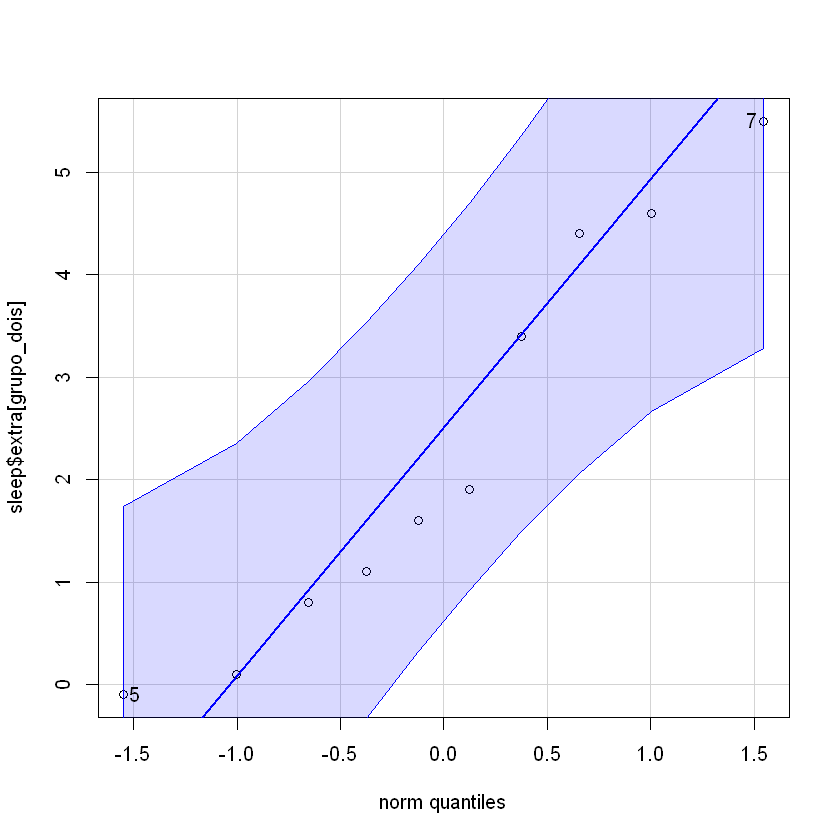

In [54]:
#Uma maneira rápida de verificar se os dados seguem uma distribuição normal é por meio do qqPlot
qqPlot(sleep$extra[grupo_dois])

[1] 7 6

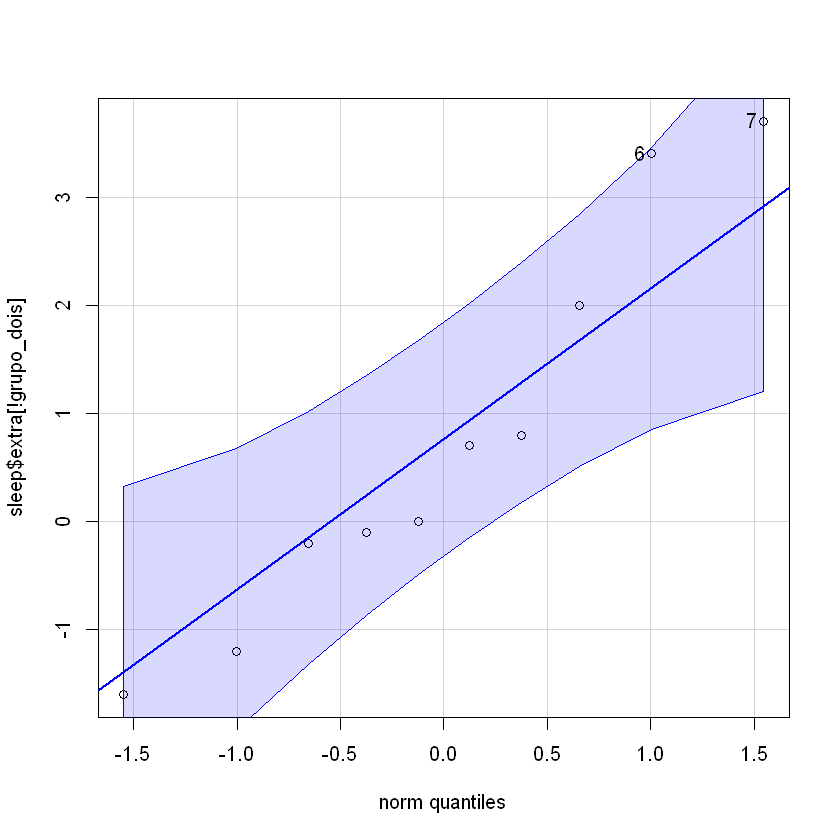

In [55]:
qqPlot(sleep$extra[!grupo_dois])

O QQ-plot, ou gráfico quantil-quantil, é uma ferramenta usada para visualizar a semelhança entre a distribuição de uma amostra de dados e uma distribuição teórica, geralmente a distribuição normal.

**Análise:** Os pontos de dados da variável 'extra' estão dentro da área de confiança, indicando que os dados seguem uma distribuição normal.

In [56]:
# Teste de Shapiro para o grupo 2
shapiro.test(sleep$extra[grupo_dois]) 


	Shapiro-Wilk normality test

data:  sleep$extra[grupo_dois]
W = 0.9193, p-value = 0.3511


In [57]:
# Teste de Shapiro para o grupo 1
shapiro.test(sleep$extra[!grupo_dois])


	Shapiro-Wilk normality test

data:  sleep$extra[!grupo_dois]
W = 0.92581, p-value = 0.4079


O valor-p do teste de cada grupo é maior que 0.05 e então falhamos em rejeitar a H0. **Podemos assumir que os dados seguem uma distribuição normal.**

### Validando a Suposição 5 com Teste F

- H0 = As médias de dados extraídos de uma população normalmente distribuída tem a mesma variância.

In [58]:
# Primeiro checamos se há valores ausentes
colSums(is.na(sleep))

extra group    ID 
    0     0     0

In [59]:
# Vejamos um resumo estatístico do dataset para grupo 2
summary(sleep$extra[grupo_dois])
sd(sleep$extra[grupo_dois])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -0.100   0.875   1.750   2.330   4.150   5.500 

[1] 2.002249

In [60]:
# Vejamos um resumo estatístico do dataset para grupo 1
summary(sleep$extra[!grupo_dois])
sd(sleep$extra[!grupo_dois])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.600  -0.175   0.350   0.750   1.700   3.700 

[1] 1.78901

In [61]:
#Aplicando teste F, variável extra como dependente, variável group = independente;
var.test(extra ~ group, data = sleep)


	F test to compare two variances

data:  extra by group
F = 0.79834, num df = 9, denom df = 9, p-value = 0.7427
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.198297 3.214123
sample estimates:
ratio of variances 
         0.7983426 


O valor-p é de 0.7427, logo, maior que 0.05. Falhamos em rejeitar a H0. **Não há diferença significativa enre as variâncias dos 2 grupos.**

### Suposições validadas. Agora sim podemos aplicar o Teste t.

**Aplicamos o Teste t para responder a questão:**
- H0 (Hipótese Nula) – Não há diferença significativa entre as médias dos 2 grupos

In [62]:
# Aplicamos o Teste t para responder a questão:
t.test(extra ~ group, data = sleep, var.equal = TRUE)


	Two Sample t-test

data:  extra by group
t = -1.8608, df = 18, p-value = 0.07919
alternative hypothesis: true difference in means between group 1 and group 2 is not equal to 0
95 percent confidence interval:
 -3.363874  0.203874
sample estimates:
mean in group 1 mean in group 2 
           0.75            2.33 


## Análise Final:

**O valor-p do teste é 0.07919, logo, maior que 0.05. Falhamos em rejeitar a H0.** Podemos concluir que os 2 grupos não tem diferença significativa. Não há diferença significativa entre os medicamentos aplicados para tratar distúrbios do sono.


## Modelo de Regressão Linear

A Regressão Linear é uma técnica estatística utilizada para modelar a relação entre uma variável dependente (também chamada de variável resposta ou variável alvo) e uma ou mais variáveis independentes (também chamadas de variáveis explicativas ou preditoras).

A Regressão Linear tem como objetivo estimar os coeficientes da equação que melhor descreve essa relação, minimizando a soma dos erros quadráticos entre os valores observados e os valores previstos pelo modelo.

O modelo de regressão linear simples é representado pela equação:

 **Y = β0 + β1*X + ε**

-  **Y** - é a variável dependente.
-  **X** - é a variável independente.
-  **β0** - é o coeficiente linear, ponto que corta o eixo y (intercepto).
-  **β1** - é o coeficiente associado a X (a inclinação)
-  **ε** - é o erro.

β1 também pode ser entendido como a taxa de variação de Y dependente de X, ou seja, o quanto a variável dependente (Y) muda em resposta a uma unidade de mudança na variável independente (X). Estes termos se relacionam de forma indireta com a trigonometria, assim B1 também pode ser definida como a tangente do ângulo α (alfa), uma vez que, a tangente do ângulo alfa é a razão entre o comprimento do cateto oposto e o comprimento do cateto adjacente.

![regresao](regressao_linear.jpg)

**O erro previsto (ε)** na equação da reta em um modelo de regressão linear é a diferença entre o valor observado da variável dependente (Y) e o valor previsto pelo modelo (Ŷ). Em outras palavras, o erro (ε) é a diferença entre os valores reais e os valores estimados pela equação da reta. **Ele também é chamado de valor residual ou muitas vezes chamado de resíduo**

**A fórmula para o erro é:**

**ε = Y - Ŷ**
Onde:

- **ε** é o erro
- **Y** é o valor observado da variável dependente
- **Ŷ** é o valor previsto pela equação da reta (Ŷ = β0 + β1*X)

Os valores residuais podem ser positivos (indicando que o modelo subestimou o valor observado) ou negativos (indicando que o modelo superestimou o valor observado), ou até mesmo zero se o modelo previr com precisão o valor observado.**O valor residual não deve exibir um padrão através da variável depedente.**

**Quando você representa os dados em um gráfico de dispersão em relação à reta de regressão, o valor residual é a distância vertical entre o ponto de dados real e a reta de regressão.A imagem abaixo representa o erro residual no gráfico de dispersão do data frame mtcars:**

![erro_residual](erro_residual.jpg)

### Erro Padrão

O erro padrão amostral (Standard Error em inglês) é uma medida estatística que quantifica a variação ou a dispersão de uma estatística de amostra, como a média, em relação a várias amostras retiradas da mesma população. **Sendo assim, é uma medida que ajuda a verificar a confiabilidade da média amostral calculada.**  

Desta forma, o erro padrão amostral é uma medida importante na estatística que fornece informações sobre a precisão das estimativas amostrais e ajuda avaliar o quão representativa uma amostra é em relação à população da qual foi retirada. **Quanto menor o erro padrão, maior a precisão das estimativas.**

**Para calcular o erro padrão, geralmente usa-se a seguinte fórmula:**

SE =  s/√n
     
Onde:
- SE é o erro padrão;
- s é o desvio padrão das observações na amostra;
- n é o tamanho da amostra.


Suponha que desejassemos estimar a média de uma determinada característica em uma população, como a altura média de todas as pessoas em um país. **Em vez de medir todas as pessoas do país, coletamos diversas amostras do mesmo tamanho, que são um grupo menor de pessoas representativo da população. Cada vez que você calcula a média a partir dessas amostras, você obtém um valor ligeiramente diferente. Essa variação é o que o erro padrão amostral nos ajuda a medir. Quanto maior o erro padrão, maior a variação nas estimativas da média.**

**Obs.:**  Ao calcularmos o erro padrão da média (ou erro padrão das médias), não calculamos vários desvios padrão para cada amostra, mas sim um único desvio padrão que representa a variabilidade das médias amostrais.

### Como podemos utilizar o erro padrão?

Por meio do erro padrão, pode-se estimar um **intervalo de confiança** para a média populacional a partir da média amostral calculada. 

Em que **intervalo de confiança** representa uma estimativa estatística que fornece um intervalo onde um parâmetro populacional estará contido. 

Já o **nível de confiança** representa a probabilidade que a nossa estimativa esteja dentro daquele intervalo. 

#### Vamos gerar valores aleatórios para demonstrar  o uso destas estatísticas:

In [63]:
dados1 <- sample(400:600, 50, replace = TRUE)
dados1

[1] 528 440 454 452 572 436 418 588 585 587 461 512 413 477 491 599 592 460 405
[20] 427 429 414 519 443 504 425 427 569 423 445 516 539 546 514 494 415 578 549
[39] 457 456 473 443 494 569 461 465 454 510 538 410

In [64]:
#Desvio padrão e média
sd(dados1)
mean(dados1)

[1] 59.11844

[1] 487.52

In [65]:
# Erro padrão
erro_padrao_dados1 <- sd(dados1) / sqrt(length(dados1))
erro_padrao_dados1

[1] 8.360609

Erro padrão = 8,295

## Escore Z

**Basicamente pode ser definido como o quanto uma medidade se afasta da média em termos de desvios-padrão**
 - Quando o escore Z é positivo isto indica que o dado está acima da média e quando o mesmo é negativo significa que o dado está abaixo da média.
 - Aproximadamente 99,72% da área sob a curva da Distribuição Normal padrão (com média 0 e desvio padrão 1) está contida no intervalo de -3 a +3 desvios padrão da média. 
 
![escore_z](dis_normal.jpg)

### Escore Z e intervalo de confiança

**Quando estabelecemos um nível de confiança de 95%, por exemplo, estamos indicando que aproximadamente 95% dos valores estarão contidos em um intervalo de cerca de 1,96 desvios padrão da média em uma distribuição normal padrão.** O valor de 1,96 é usado como um valor de referência para um nível de confiança de 95% em uma distribuição normal padrão. Isso significa que você está 95% confiante de que a média populacional (ou o parâmetro de interesse) está dentro desse intervalo.

**Para um nível de confiança de 95%, aproximadamente 95% da área sob a curva da distribuição normal padrão está contida entre -1,96 e +1,96 desvios padrão da média. Portanto, ao construir um intervalo de confiança de 95%, você usa o valor de 1,96 como um fator de escala para determinar o intervalo em torno da média.**

![nivel_confianca](nivel_confia.jpg)

### O escore Z é conhecido e a tabela abaixo indica o valor em cada situação desejada.

In [66]:
#Criando tabela com z score e nivel de confianca
tabela_confianca <- data.frame(
        Nivel_de_Confianca = c(0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99),
        Valor_Z = c(1.645, 1.695, 1.751, 1.812, 1.881, 1.960, 2.054, 2.170, 2.326, 2.576)
    )
tabela_confianca

Nivel_de_Confianca,Valor_Z
<dbl>,<dbl>
0.90,1.645
0.91,1.695
0.92,1.751
0.93,1.812
0.94,1.881
0.95,1.960
0.96,2.054
0.97,2.170
0.98,2.326


### Agora vamos calcular um intervalo de confiança para a média com um nível de 95% confiança.

In [67]:
# Função para calcular o intervalo de confiança
intervalo_confian <- function(x, y) {
    
    # Verifica se y é um valor válido. Para cada valor de y, verifica se é igual a cada valor da coluna Nível de Confiança.
    # Se a condição for atendida, o valor associado à coluna Valor_Z será armazenado na variável valor_z.
    
    if (y %in% tabela_confianca$Nivel_de_Confianca) {
        valor_z <- tabela_confianca$Valor_Z[tabela_confianca$Nivel_de_Confianca == y]
        cat('Valor Z:', valor_z, '\n') # É responsável por imprimir uma mensagem no console
        
        # Cálculo
        erro_padrao_dados <- sd(x) / sqrt(length(x))
        lower <- mean(x) - valor_z * erro_padrao_dados
        upper <- mean(x) + valor_z * erro_padrao_dados
        cat('Limite Inferior:', lower, '\n')
        cat('Limite Superior', upper, '\n')
        
        # Atribuir os valores de lower e upper a variáveis globais
        #envir = .GlobalEnv especifica que queremos que essa variável seja global.
        assign('lower', lower, envir = .GlobalEnv)
        assign('upper', upper, envir = .GlobalEnv)
        
    } else {
        cat('Valor Z não encontrado na tabela\n')
    }
}

In [68]:
intervalo_confian(dados1,0.95)

Valor Z: 1.96 
Limite Inferior: 471.1332 
Limite Superior 503.9068 


In [69]:
cat('Portanto, podemos considerar que existe a probabilidade de 95% do intervalo de', lower, 'a', upper,'conter a 
média dos dados.')

Portanto, podemos considerar que existe a probabilidade de 95% do intervalo de 471.1332 a 503.9068 conter a 
média dos dados.

In [70]:
# Para criar um gráfico pelo ggplot precisamos criar alguns objetos que definem os dados;

# Armazenando a media em um objeto
media <-mean(dados1)

# Criando um data frame com os valores necessários para criação do gráfico 
data <- data.frame(Media = media, Lower = lower, Upper = upper)
data

Media,Lower,Upper
<dbl>,<dbl>,<dbl>
487.52,471.1332,503.9068


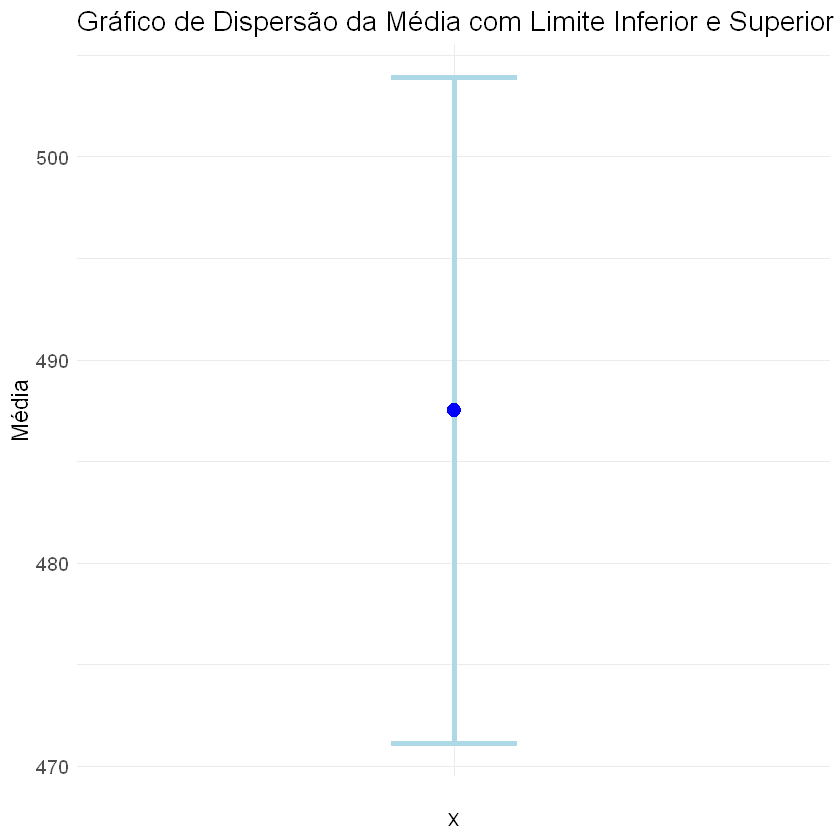

In [71]:
#Indicando que a média é representada pela posição da linha no eixo y
ggplot(data, aes(x =' ', y = Media)) +
# Adiciona uma camada gráfica de linhas verticais (ou barras verticais) que representam o intervalo de confiança
  geom_linerange(aes(ymin = Lower, ymax = Upper), linewidth = 1.5, color = "lightblue") +
#Adicionando barras horizontais
  geom_errorbar(aes(ymin = Lower, ymax = Lower), width = 0.2, linewidth = 1.5, color = "lightblue") +
  geom_errorbar(aes(ymin = Upper, ymax = Upper), width = 0.2, linewidth = 1.5, color = "lightblue") +
#Adiciona uma camada gráfica de pontos
  geom_point(size = 3.5, color = "blue") +
  labs(title = "Gráfico de Dispersão da Média com Limite Inferior e Superior", y = "Média") +
  theme_minimal() + 
theme(
    text = element_text(size = 14)  # Ajuste o tamanho da fonte (14 neste exemplo)
  )